In [ ]:
import pandas as pd
import numpy as np
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
import scipy.stats as ss
from sklearn.metrics import mean_squared_log_error
from scipy.stats import gaussian_kde
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [6]:
def statsF(tbl, label1, label2):
    bias = sum(tbl[label1] - tbl[label2]) / len(tbl)
    pr, pp = ss.pearsonr(tbl[label1], tbl[label2])
    sr, sp = ss.spearmanr(tbl[label1], tbl[label2])
    rmsle = np.sqrt(mean_squared_log_error(tbl[label1], tbl[label2]))
    return bias, pr, sr, rmsle
                    
def plotFull(tbl, label1, label2, sr, pr, rmsle, bias, axs, ax1, ax2):
        
    # Get x and y data 
    x = np.log10(tbl[label1])
    y = np.log10(tbl[label2])

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    ## actual plotting 
    f = axs[ax1, ax2].scatter(x, y, c=z, s=5)
    plt.plot(np.arange(-2, 6), np.arange(-2, 6), c='black', linestyle = '--')
    plt.colorbar(f)
    
    
    textstr = '\n'.join((
    r'$r=%.2f$' % (pr, ),
    r'$\rho=%.2f$' % (sr ),
    r'$RMSLE=%.2f$' % (rmsle, ),
    r'$Bias=%.2f$' % (bias, )))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    axs[ax1, ax2].text(0.05, 0.95, textstr, fontsize=10, verticalalignment='top', bbox=props)

    plt.show()

def plotSingle(tbl, label1, label2, sr, pr, rmsle, bias):
    
    fig, ax = plt.subplots()
        
    # Get x and y data 
    x = np.log10(tbl[label1])
    y = np.log10(tbl[label2])

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    ## actual plotting 
    f = ax.scatter(x, y, c=z, s=5)
    plt.plot(np.arange(-2, 6), np.arange(-2, 6), c='black', linestyle = '--')
    plt.colorbar(f)
    
    ## renaming axes
    x = [10.0**x for x in np.arange(-2, 6)]
    l = np.arange(-2, 6)
    ax.set_xticks(l)
    ax.set_xticklabels(x, rotation = 20)
    ax.set_yticks(l)
    ax.set_yticklabels(x)
    
    textstr = '\n'.join((
    r'$r=%.2f$' % (pr, ),
    r'$\rho=%.2f$' % (sr ),
    r'$RMSLE=%.2f$' % (rmsle, ),
    r'$Bias=%.2f$' % (bias, )))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

    plt.show()

In [ ]:
## true
simple = pd.read_csv('../../simulation_study/simple/treeFiles/simple_true.txt', sep = '\t')
comple = pd.read_csv('../../simulation_study/complex/treeFiles/complex_true.txt', sep = '\t')

true = [simple, comple]

wes simple Relate


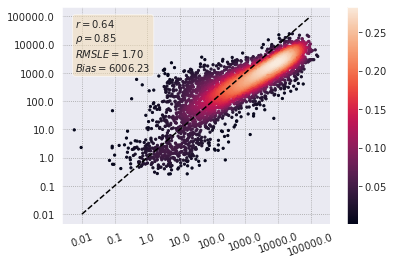

wes simple GEVA


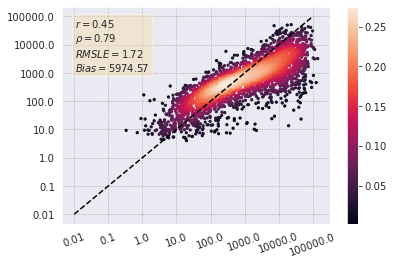

wes simple tc


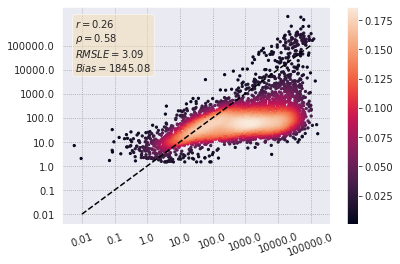

wes complex Relate


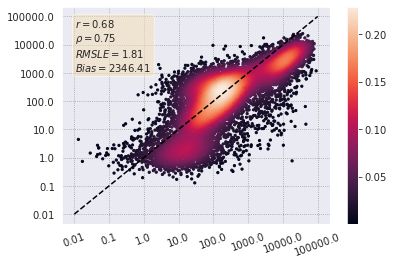

wes complex GEVA


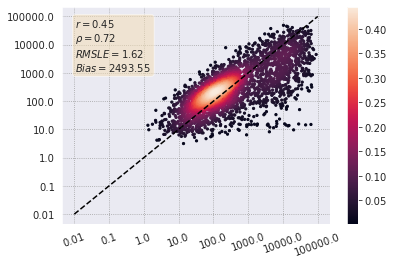

wes complex tc


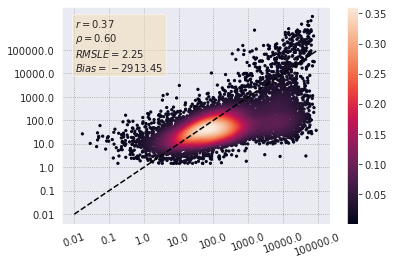

wgs simple Relate


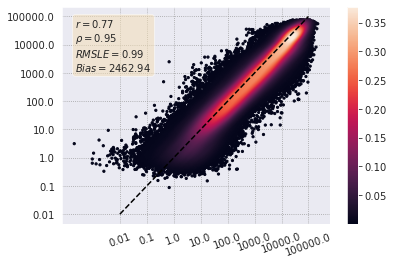

wgs simple GEVA


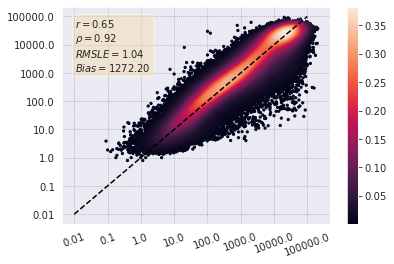

wgs simple tc


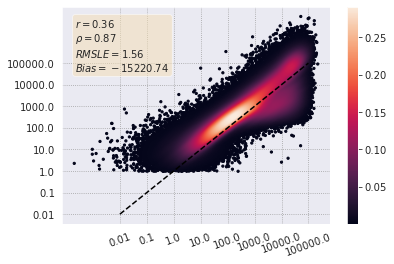

wgs complex Relate


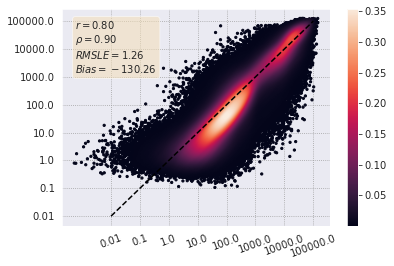

wgs complex GEVA


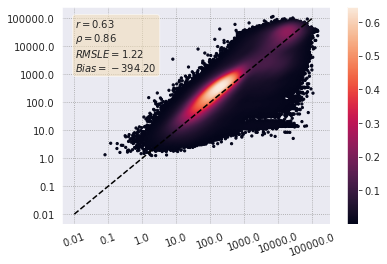

wgs complex tc


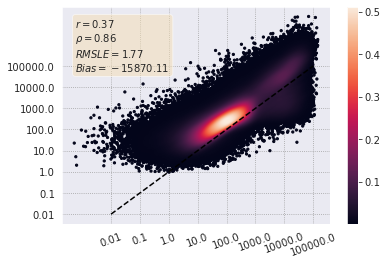

In [14]:
for typ in ['wes', 'wgs']:
    for i, model in enumerate(['simple', 'complex']):
        for j, p in enumerate(['Relate', 'GEVA', 'tc']):
            if j == 0:
                rel = pd.read_csv('../{}/relate/{}/chr22_{}_{}.mut'.format(model,typ, typ, model), sep = ';')
                relM = rel.merge(true[i], left_on = 'pos_of_snp', right_on ='position').drop_duplicates()
                relM.loc[:, 'relAge'] = relM[['age_begin', 'age_end']].mean(axis=1)
                relF = relM[relM['relAge'] > 0]
                relF.reset_index(inplace = True)
                
                bias, pr, sr, rmsle = statsF(relF, 'mutationTime', 'relAge')
                print(typ, model, p)
                plotSingle(relF, 'mutationTime', 'relAge', sr, pr, rmsle, bias)
            if j == 1:
                try:
                    geva = pd.read_csv('../{}/GEVA/{}/chr22_{}_{}_estimates.csv'.format(model, typ, model, typ))
                except:
                    print('Missing {}, {}'.format(model, p))
                else:
                    gevaM = geva.merge(true[i], left_on = 'Position', right_on = 'position').drop_duplicates()
                    gevaM.reset_index(inplace = True)
                    bias, pr, sr, rmsle = statsF(gevaM, 'mutationTime', 'PostMode')
                    print(typ, model, p)
                    plotSingle(gevaM, 'mutationTime', 'PostMode', sr, pr, rmsle, bias) 
            if j == 2:
                try:
                    tc = pd.read_csv('../{}/tc/{}/half_{}_{}.csv'.format(model, typ, model, typ))
                except:
                    try:
                        tc = pd.read_csv('../{}/tc/{}/orig_{}_{}.csv'.format(model, typ, model, typ))
                    except:
                        print('Missing {}, {}'.format(model, p))
                        continue
                tcM = tc.merge(true[i], left_on = 'POS', right_on = 'position').drop_duplicates()
                tcM = tcM[tcM['TC'] > 0]
                tcM.reset_index(inplace = True)
                bias, pr, sr, rmsle = statsF(tcM, 'mutationTime', 'TC')
                print(typ, model, p)
                plotSingle(tcM, 'mutationTime', 'TC', sr, pr, rmsle, bias) 
                
            

In [14]:
for i, model in enumerate(['simple', 'complex']):
    for j, p in enumerate(['Relate', 'GEVA', 'tc']):
        relDif = 0
        wes = 0
        for typ in ['wes', 'wgs']:
            if j == 0:
                rel = pd.read_csv('../{}/relate/{}/chr22_{}_{}.mut'.format(model,typ, typ, model), sep = ';')
                relM = rel.merge(true[i], left_on = 'pos_of_snp', right_on ='position').drop_duplicates()
                relM.loc[:, 'relAge'] = relM[['age_begin', 'age_end']].mean(axis=1)
                relF = relM[relM['relAge'] > 0]
                relF.reset_index(inplace = True)
                
                bias, pr, sr, rmsle = statsF(relF, 'mutationTime', 'relAge')
                #print(typ, model, p, pr)
                if typ == 'wes':
                    wes = pr
                else:
                    relDif = abs(wes - pr) / pr * 100
            if j == 1:
                try:
                    geva = pd.read_csv('../{}/GEVA/{}/chr22_{}_{}_estimates.csv'.format(model, typ, model, typ))
                except:
                    print('Missing {}, {}'.format(model, p))
                else:
                    gevaM = geva.merge(true[i], left_on = 'Position', right_on = 'position').drop_duplicates()
                    gevaM.reset_index(inplace = True)
                    bias, pr, sr, rmsle = statsF(gevaM, 'mutationTime', 'PostMode')
                    #print(typ, model, p, pr)
                    
                    if typ == 'wes':
                        wes = pr
                    else:
                        relDif = abs(wes - pr) / pr * 100
            if j == 2:
                try:
                    tc = pd.read_csv('../{}/tc/{}/half_{}_{}.csv'.format(model, typ, model, typ))
                except:
                    try:
                        tc = pd.read_csv('../{}/tc/{}/orig_{}_{}.csv'.format(model, typ, model, typ))
                    except:
                        print('Missing {}, {}'.format(model, p))
                        continue
                tcM = tc.merge(true[i], left_on = 'POS', right_on = 'position').drop_duplicates()
                tcM = tcM[tcM['TC'] > 0]
                tcM.reset_index(inplace = True)
                bias, pr, sr, rmsle = statsF(tcM, 'mutationTime', 'TC')
                if typ == 'wes':
                    wes = pr
                else:
                    relDif = abs(wes - pr) / pr * 100
        print(model, p, relDif)

simple Relate 17.42925920610545
simple GEVA 31.018101052087914
simple tc 29.234700624636016
complex Relate 14.948293439935354
complex GEVA 28.298923349181177
complex tc 0.05631317164274829
